29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter Size 3 - Final Loss: 0.2872, Final Accuracy: 91.14%


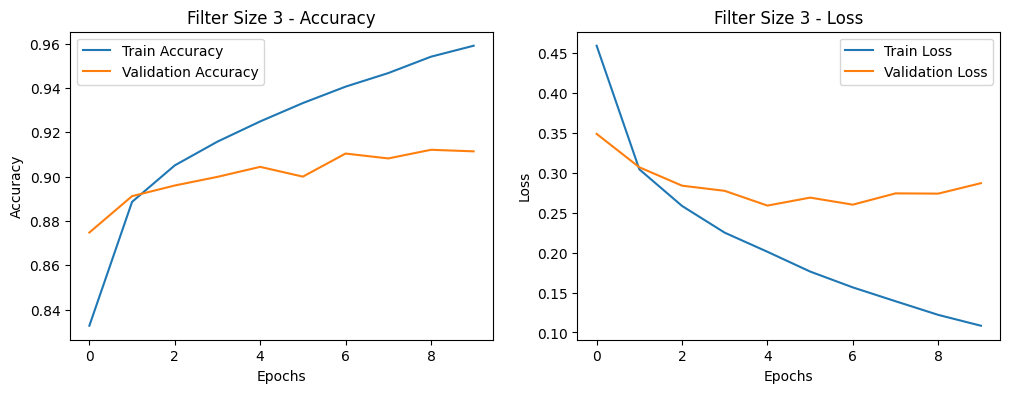

Filter Size 5 - Final Loss: 0.2865, Final Accuracy: 91.31%


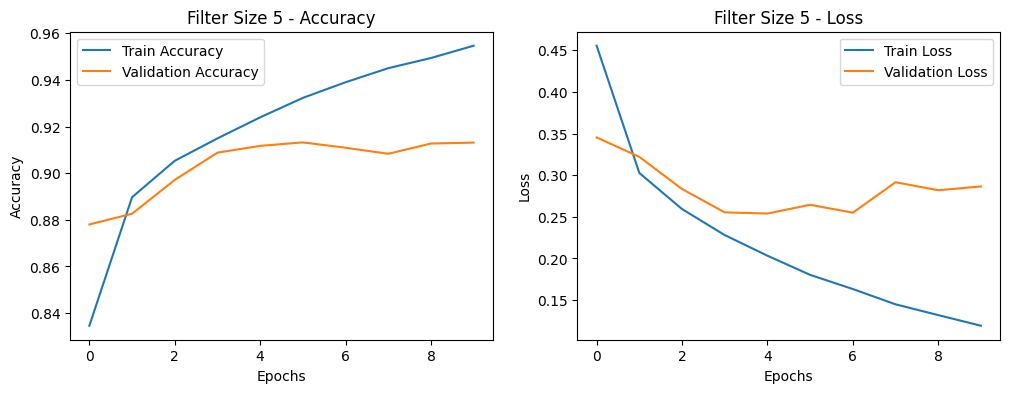

Regularization None - Final Loss: 0.3162, Final Accuracy: 90.82%


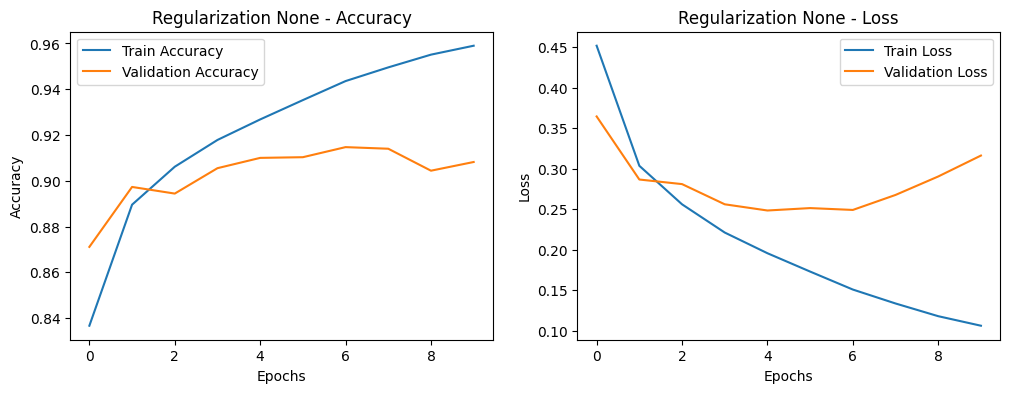

Regularization L2 - Final Loss: 0.3778, Final Accuracy: 89.59%


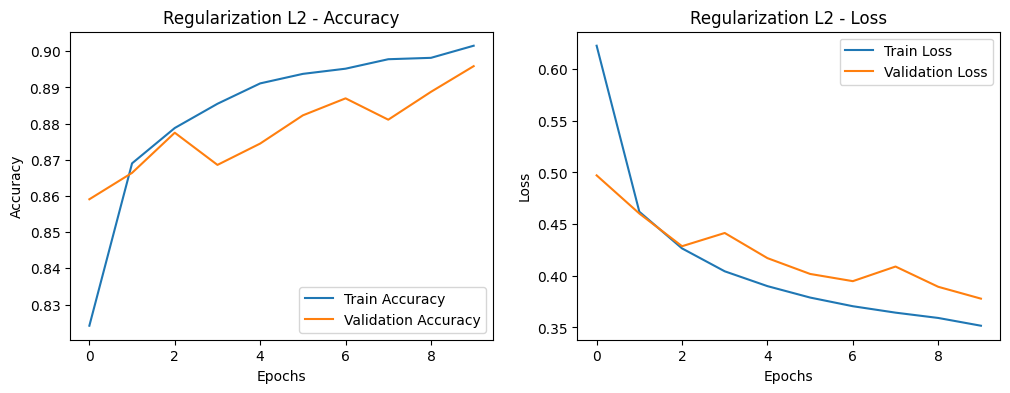

Batch Size 32 - Final Loss: 0.3063, Final Accuracy: 90.95%


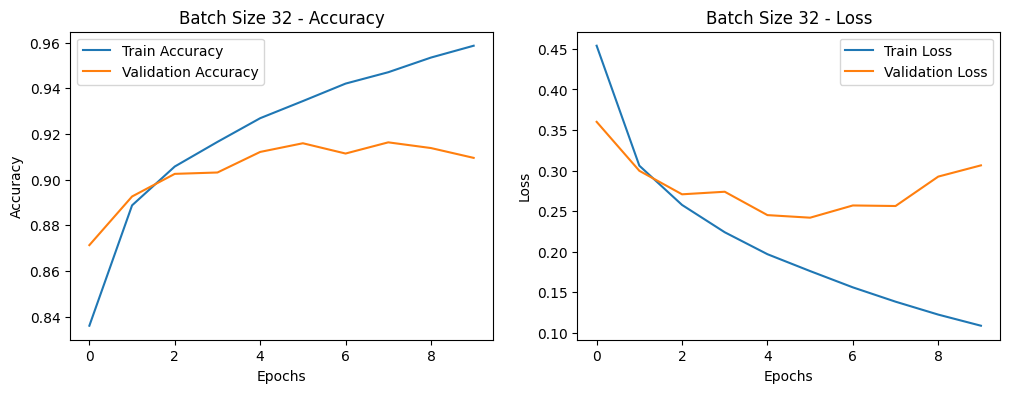

Batch Size 64 - Final Loss: 0.2685, Final Accuracy: 91.06%


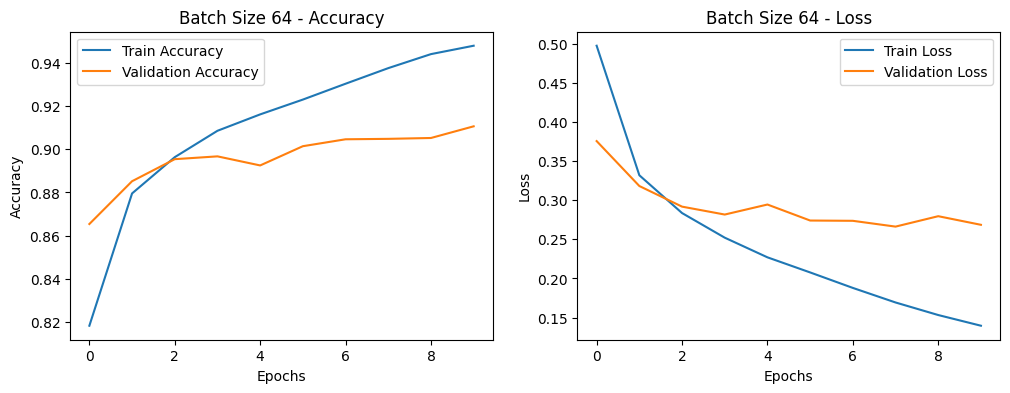

Optimizer ADAM - Final Loss: 0.2733, Final Accuracy: 91.53%


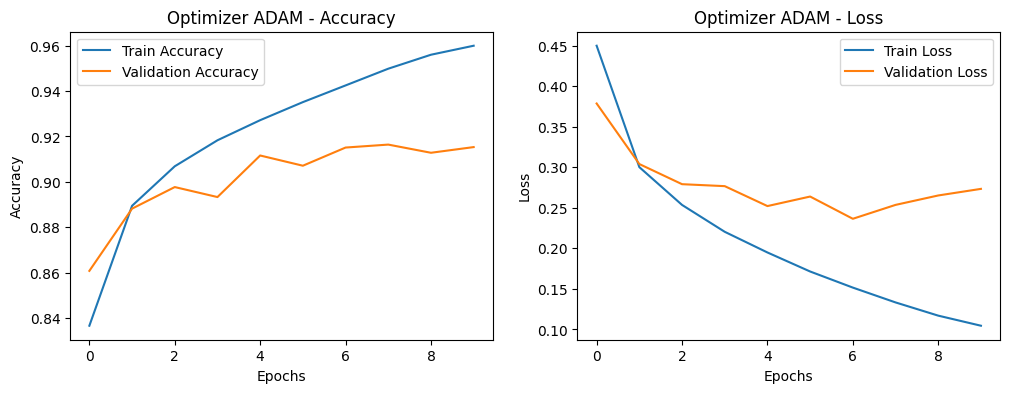

Optimizer SGD - Final Loss: 0.3490, Final Accuracy: 87.36%


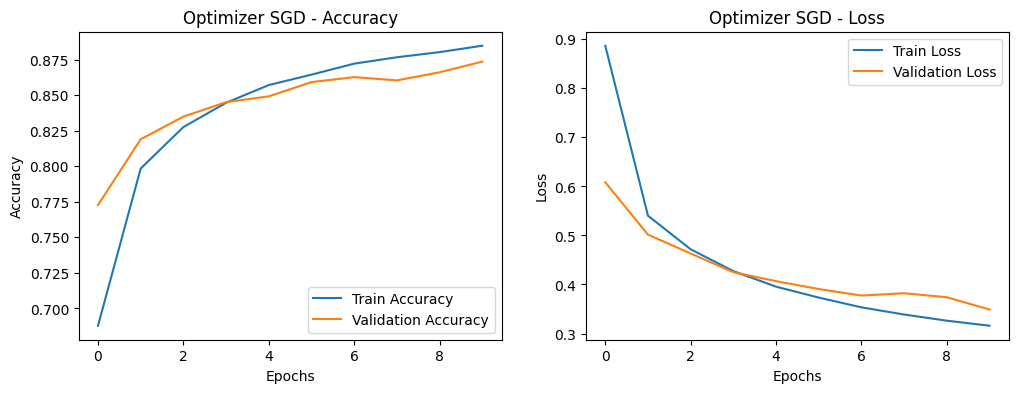

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Enable GPU acceleration
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


# Function to create a CNN model
def create_cnn(filter_size=3, reg=None, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu', kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# Function to train and evaluate model
def train_and_plot(model, batch_size=32, title="Model Performance"):
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=0)

    # Evaluate final loss and accuracy
    final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'{title} - Final Loss: {final_loss:.4f}, Final Accuracy: {final_accuracy * 100:.2f}%')

    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')

    plt.show()


# Test different filter sizes
for size in [3, 5]:
    model = create_cnn(filter_size=size)
    train_and_plot(model, title=f'Filter Size {size}')

# Test different regularization techniques
for reg in [None, regularizers.l2(0.001)]:
    model = create_cnn(reg=reg)
    train_and_plot(model, title=f'Regularization {"L2" if reg else "None"}')

# Test different batch sizes
for batch in [32, 64]:
    model = create_cnn()
    train_and_plot(model, batch_size=batch, title=f'Batch Size {batch}')

# Test different optimizers
for opt in ['adam', 'sgd']:
    model = create_cnn(optimizer=opt)
    train_and_plot(model, title=f'Optimizer {opt.upper()}')